# Generación de la red neuronal

En este notebook se generará la red neuronal utilizando Pytorch.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("datos_preparados.csv")

In [2]:
df

,score,v_0_dist,v_0_tiem,v_1_dist,v_1_tiem,v_2_dist,v_2_tiem,v_3_dist,v_3_tiem,v_4_dist,...,v_5_dist,v_5_tiem,v_6_dist,v_6_tiem,v_7_dist,v_7_tiem,v_8_dist,v_8_tiem,v_9_dist,v_9_tiem
0,0.587151,0.112671,0.700000,0.238930,0.466667,0.240804,0.233333,0.266376,0.266667,0.275522,...,0.277959,0.500000,0.283555,0.466667,0.286049,0.600000,0.302431,0.633333,0.303229,0.166667
1,0.733958,0.018951,0.166667,0.089886,0.433333,0.098781,0.066667,0.113784,0.066667,0.115626,...,0.122973,0.466667,0.126062,0.600000,0.127179,0.133333,0.127710,0.500000,0.154003,0.900000
2,0.628651,0.040814,0.033333,0.041370,0.033333,0.050244,0.833333,0.054075,0.066667,0.057232,...,0.061261,0.766667,0.064387,0.533333,0.095195,0.233333,0.105247,0.966667,0.167678,0.733333
3,0.501681,0.121885,0.366667,0.147557,0.400000,0.175356,0.433333,0.176455,0.100000,0.204137,...,0.270742,0.100000,0.271145,0.833333,0.297303,0.766667,0.311252,0.866667,0.313011,0.233333
4,0.734773,0.025289,0.733333,0.056600,0.766667,0.077926,0.100000,0.096454,0.966667,0.144502,...,0.154292,0.700000,0.179372,0.333333,0.181094,0.166667,0.203732,0.933333,0.207678,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361019,0.254874,0.208194,0.366667,0.230433,0.033333,0.493439,0.266667,0.576054,0.700000,0.597056,...,0.622809,0.900000,0.647953,0.733333,0.652337,0.966667,0.652337,0.766667,0.652337,0.300000
361020,0.254874,0.229212,0.366667,0.254242,0.033333,0.515213,0.266667,0.599310,0.700000,0.626039,...,0.627384,0.266667,0.628585,0.900000,0.630442,0.966667,0.630442,0.766667,0.630442,0.300000
361021,0.276802,0.184383,0.033333,0.223806,0.366667,0.446496,0.266667,0.529780,0.700000,0.569909,...,0.630796,0.400000,0.656477,0.900000,0.694656,0.733333,0.699051,0.966667,0.699051,0.766667
361022,0.254874,0.221931,0.366667,0.242994,0.033333,0.504732,0.266667,0.588381,0.700000,0.615068,...,0.628181,0.900000,0.636306,0.733333,0.640703,0.966667,0.640703,0.766667,0.640703,0.300000


### Preparación de datos

Debido a que los datos fueron generados en el notebook anterior, solo basta con probar el acceso que utilizará la clase de dataset generada para Pytorch.

In [3]:
np.array(df.iloc[0,0]).reshape(1, -1)

array([[0.5871508]])

### Generación de clase dataset

Para su uso en Pytorch, conviene generar una clase para el tratamiento del dataset. Este simplemente es una forma de accesar a un elemento individual de nuestro dataframe.

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader

torch.device('cpu'), torch.cuda.device('cuda'), torch.cuda.device('cuda:1')

class CDMXDataset(Dataset):
    """CDMX dataset."""

    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        score = np.array(self.df.iloc[idx, 0]).reshape(1, -1)
        features = np.array(self.df.iloc[idx, 1:]).reshape(1, -1)
        
        sample = {'features': features, 'score': score}

        return sample

### Instanciación de datasets

En esta parte genero los objetos de dataset para cada uno de los dataframes. 

Generaré una división en conjuntos de entrenamiento, desarrollo y prueba para el entrenamiento y comprobación de la red.

In [5]:
#df = df.drop(["v_7_dist","v_7_tiem","v_8_dist","v_8_tiem","v_9_dist","v_9_tiem"], axis=1)

In [6]:
data_size = len(df)
data_size

361024

In [7]:
train_size = np.ceil((len(df) * 0.80)).astype(int).item()
test_size = np.ceil((len(df) * 0.1)).astype(int).item()
dev_size = (len(df) - (train_size + test_size))

In [8]:
ds = CDMXDataset(df)

train_batch_size = np.ceil(train_size/30).astype(int).item()

train, dev, test = torch.utils.data.random_split(ds, [train_size, test_size, dev_size], generator=torch.Generator().manual_seed(42))

trainloader = DataLoader(train, batch_size=train_batch_size, shuffle=True,pin_memory=True)
devloader = DataLoader(dev, batch_size=dev_size,shuffle=False,pin_memory=True)

In [9]:
import torch.nn as nn
import torch.nn.functional as F
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

### Definición de la red neuronal

Será una muy simple, con una sola capa oculta. Esta tendrá funciones de activación ReLu y una sigmoide para la capa de salida debido al intervalo de valores deseado (entre 0 y 1).

In [10]:
"""

Red C-5:
Parece converger con:
avg. training loss 0.05917447567938195 and avg. dev loss 0.07621906946221527.
Usados:
Adam lr=0.005,0.003
Net(
  (fc1): Linear(in_features=20, out_features=26, bias=True)
  (fc2): Linear(in_features=26, out_features=18, bias=True)
  (fc3): Linear(in_features=18, out_features=12, bias=True)
  (fc4): Linear(in_features=12, out_features=6, bias=True)
  (fc5): Linear(in_features=6, out_features=1, bias=True)
)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(20, 26)
        self.fc2 = nn.Linear(26, 18)
        self.fc3 = nn.Linear(18, 12)
        self.fc4 = nn.Linear(12, 6)
        self.fc5 = nn.Linear(6, 1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        return x
net = Net()
net = net.double()

"""
# Asumo avoidable bias > Variance y aumentó el performance en dev set, por lo que el aumento en complejidad de la
# red se justifica.
"""

Red C-7:
Parece converger con:
avg. training loss 0.05004948045949362 and avg. dev loss 0.06486330087820615.
Usados:
Adam lr=0.01,0.005


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(20, 26)
        self.fc2 = nn.Linear(26, 18)
        self.fc3 = nn.Linear(18, 18)
        self.fc4 = nn.Linear(18, 12)
        self.fc5 = nn.Linear(12, 10)
        self.fc6 = nn.Linear(10, 6)
        self.fc7 = nn.Linear(6, 1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = torch.sigmoid(self.fc7(x))
        return x
net = Net()
net = net.double()

"""
#Red C-11

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(20, 26)
        self.fc2 = nn.Linear(26, 28)
        self.fc3 = nn.Linear(28, 18)
        self.fc4 = nn.Linear(18, 15)
        self.fc5 = nn.Linear(15, 15)
        self.fc6 = nn.Linear(15, 12)
        self.fc7 = nn.Linear(12, 12)
        self.fc8 = nn.Linear(12, 10)
        self.fc9 = nn.Linear(10, 6)
        self.fc10 = nn.Linear(6, 6)
        self.fc11 = nn.Linear(6, 1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        x = torch.sigmoid(self.fc11(x))
        return x
net = Net()
net = net.double().to(device)

In [11]:
net = torch.load('best-model.pt')

### Optimizador y criterio

Para esta red se usará un criterio de error absoluto medio y un optimizador de descenso de gradiente estocástico con momento.

In [21]:
import torch.optim as optim

criterion = nn.L1Loss()
#optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9, weight_decay=1e-6)
#scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.00375, max_lr=0.03)
optimizer = optim.Adam(net.parameters(), lr = 0.01, weight_decay=1e-6)#[c11_h1_0.01_h2_1e-07.pt]
#optimizer = optim.Adam(net.parameters(), lr = 0.001, weight_decay=1e-3)

### Entrenamiento de la red neuronal

In [13]:
loss_per_epoch = [0]
training_loss = [0]
stop_after_best = 100
best_l = None
best_tl = None
worst_l = 0
worst_tl = 0
last_epoch_save = 0

###############################################
Current epoch: 591
Last model save was in epoch 491
Stopping training in: 1 epochs.
###############################################
[Best iter] training loss is: 0.04285566929573087
[Best iter] dev loss is: 0.06983152362696608
###############################################
[Last iter] training loss was: 0.04193613597884296
[Last iter] dev. loss was: 0.07793476656424764
###############################################


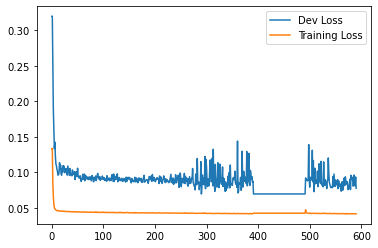

Batch 1 done.
Batch 2 done.
Batch 3 done.
Batch 4 done.
Batch 5 done.
Batch 6 done.
Batch 7 done.
Batch 8 done.
Batch 9 done.
Batch 10 done.
Batch 11 done.
Batch 12 done.
Batch 13 done.
Batch 14 done.
Batch 15 done.
Batch 16 done.
Batch 17 done.
Batch 18 done.
Batch 19 done.
Batch 20 done.
Batch 21 done.
Batch 22 done.
Batch 23 done.
Batch 24 done.
Batch 25 done.
Batch 26 done.
Batch 27 done.
Batch 28 done.
Batch 29 done.
Batch 30 done.
Finished Training


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

stop_after_best = 100
#Nombre del archivo de backup
savefile = 'best-model.pt'

epochs_without_change = 0
epochs = len(loss_per_epoch)

while epochs_without_change < stop_after_best:  # itero hasta que no mejore el desempeño en dev por 10 épocas
    display.clear_output(wait=True)
    print("###############################################")
    print("Current epoch: " + str(epochs))
    print("Last model save was in epoch " + str(last_epoch_save))
    print("Stopping training in: " + str(stop_after_best - epochs_without_change) + " epochs.")
    print("###############################################")
    print("[Best iter] training loss is: " + str(best_tl))
    print("[Best iter] dev loss is: " + str(best_l))
    print("###############################################")
    print("[Last iter] training loss was: " + str(training_loss[-1]))
    print("[Last iter] dev. loss was: " + str(loss_per_epoch[-1]))
    print("###############################################")
    #Dibujo lo que puedo
    plt.plot(range(epochs), loss_per_epoch)
    plt.plot(range(epochs), training_loss)
    plt.legend(["Dev Loss", "Training Loss"])
    plt.show()
    tl = 0
    for i, data in enumerate(trainloader, 0):
        inputs = data['features'].to(device)
        labels = data['score'].to(device)
        # pongo las gradientes en cero
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.double())
        loss = criterion(outputs, labels)
        tl += loss.item()
        loss.backward()
        optimizer.step()
        #scheduler.step()
        print("Batch "+ str(i+1) + " done.")
    tl /= np.ceil(len(df)/train_batch_size) #Asumo lotes del mismo tamaño
    l = 0
    #evaluar el modelo
    net.eval()
    with torch.no_grad():
      for data in devloader:
          outputs = net(data['features'].double().to(device))
          l += criterion(outputs, data['score'].to(device)).item()
    net.train()
    epochs_without_change += 1
    if best_l is None or best_l >= l:
        torch.save(net, savefile)
        best_l = l
        best_tl = tl
        epochs_without_change = 0
        last_epoch_save = epochs
        print("Model improved, saved.")
    #Para graficar con una escala coherente.
    if(tl > worst_tl):
        worst_tl = tl
        training_loss[0] = worst_tl
    if(l > worst_l):
        worst_l = l
        loss_per_epoch[0] = worst_l
    #Rastreo las perdidas
    loss_per_epoch.append(l)
    training_loss.append(tl)
    #Rastreo la época actual
    epochs += 1
    #print("Finished epoch " + str(epochs) + " with avg. training loss " + str(tl)+ " and avg. dev loss "+ str(l) + ".")
print('Finished Training')

Durante el entrenamiento noté que existieron puntos en los que el modelo parecía converger con algunos hiperparámetros, por lo que experimenté cambiar los mismos de tal manera que se pudiera acelerar el entrenamiento a un nivel de desempeño aceptable en el conjunto dev (0.045 de error absoluto).

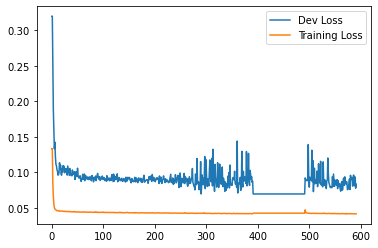

In [23]:
#Debido a un reinicio de la computadora se perdieron los datos de desempeño en épocas anteriores.
import matplotlib.pyplot as plt
plt.plot(range(epochs), loss_per_epoch)
plt.plot(range(epochs), training_loss)
plt.legend(["Dev Loss", "Training Loss"])

In [24]:
testloader = DataLoader(test,shuffle=False)

In [25]:
net = torch.load(savefile)
l = 0
salidas = []
net.eval()
with torch.no_grad():
  for data in testloader:
    outputs = net(data['features'].double().to(device))
    salidas.append([data['score'].item(),outputs.item()])
    l += criterion(outputs, data['score'].to(device)).item()
net.train()

l/=len(testloader)
print('Avg. test loss: '+str(l))

Avg. test loss: 0.05449132474741283


In [26]:
df_comp = pd.DataFrame(salidas, columns=['pred', 'score'])

In [27]:
df_comp.take(range(10))

,pred,score
0,0.197198,0.207051
1,0.228939,0.205312
2,0.228939,0.436900
3,0.559365,0.573916
4,0.670006,0.617333
5,0.650826,0.658177
6,0.528315,0.549116
7,0.843473,0.824033
8,0.528315,0.551045
9,0.254874,0.220303


El desempeño de esta arquitectura parece aceptable, ya que otras más complejas no parecen ofrecer mejoras en desempeño en la función de perdida para el conjnto development. Con este modelo listo se puede proceder a hacer el despliegue. 

In [33]:
pytorch_total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
pytorch_total_params

2942